In [102]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import (StandardScaler,
                                   PolynomialFeatures)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV
from scipy.stats import boxcox
from scipy.stats.mstats import normaltest
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import Normalizer

In [103]:
df = pd.read_excel("/content/Linear_Regression_data.xlsx")

In [104]:
df

,Firm Capacity (MGD),Lift Station,Daily inflow (MGD),Downtime (hr),Population (X 1000)
0,1.00,A,0.95,2,8
1,0.50,B,0.30,4,5
2,0.75,C,0.30,3,4
3,2.00,D,1.40,2,14
4,1.50,E,1.20,1,12
5,2.00,F,1.50,2,13
6,2.00,G,1.60,2,15
7,1.00,H,0.70,3,8
8,1.00,I,0.60,3,7
9,1.50,J,1.00,2,9


In [105]:
df.shape

(17, 5)

In [106]:
df['Lift Station'].nunique()

17

In [107]:
df.duplicated().sum()

np.int64(0)

In [108]:
df.describe()

,Firm Capacity (MGD),Daily inflow (MGD),Downtime (hr),Population (X 1000)
count,17.000000,17.000000,17.000000,17.000000
mean,1.602941,1.167647,2.941176,10.411765
std,0.643834,0.508349,1.297622,3.410624
min,0.500000,0.300000,1.000000,4.000000
25%,1.000000,0.800000,2.000000,8.000000
50%,1.500000,1.200000,3.000000,12.000000
75%,2.000000,1.600000,4.000000,13.000000
max,2.500000,2.000000,6.000000,15.000000


In [109]:
df.isnull().sum()

,0
Firm Capacity (MGD),0
Lift Station,0
Daily inflow (MGD),0
Downtime (hr),0
Population (X 1000),0


### Data Split in X and Y

In [110]:
x = df[["Population (X 1000)"]]
x.head()

,Population (X 1000)
0,8
1,5
2,4
3,14
4,12


In [111]:
y = df[["Daily inflow (MGD)"]]
y.head()

,Daily inflow (MGD)
0,0.95
1,0.30
2,0.30
3,1.40
4,1.20


In [112]:
x.ndim

2

In [113]:
y.ndim

2

## Train Test split

In [114]:

from sklearn. model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [115]:
X_train.shape

(13, 1)

In [116]:
y_train.shape

(13, 1)

## Scatterplot

<Axes: xlabel='Population (X 1000)', ylabel='Daily inflow (MGD)'>

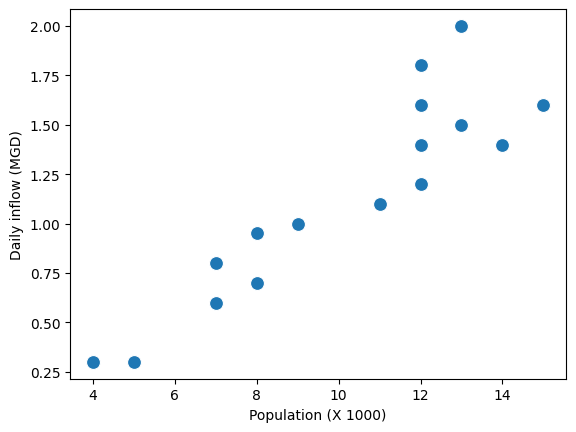

In [117]:
sns.scatterplot(
    data=df,
    x='Population (X 1000)',
    y='Daily inflow (MGD)',

    s=100               # size of markers
)

In [118]:
plt.figure(figsize=(8, 6))



df['Population (X 1000)'].corr(df['Daily inflow (MGD)'])

np.float64(0.9093695446948634)

<Figure size 800x600 with 0 Axes>

## Histogram


array([[<Axes: title={'center': 'Population (X 1000)'}>]], dtype=object)

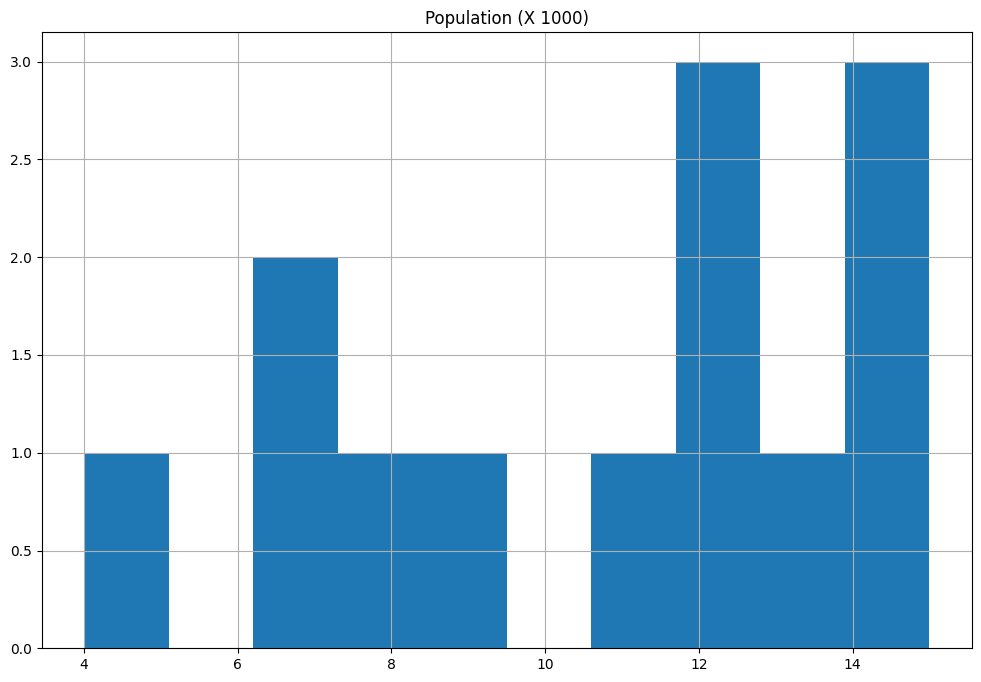

In [119]:
X_train.hist(figsize=(12,8))

## Density Plot

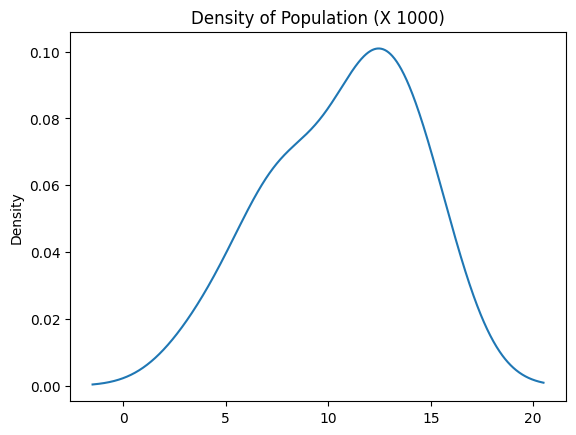

In [120]:
for col in X_train.select_dtypes('number'):
    X_train[col].plot.kde(title=f'Density of {col}')
    plt.show()

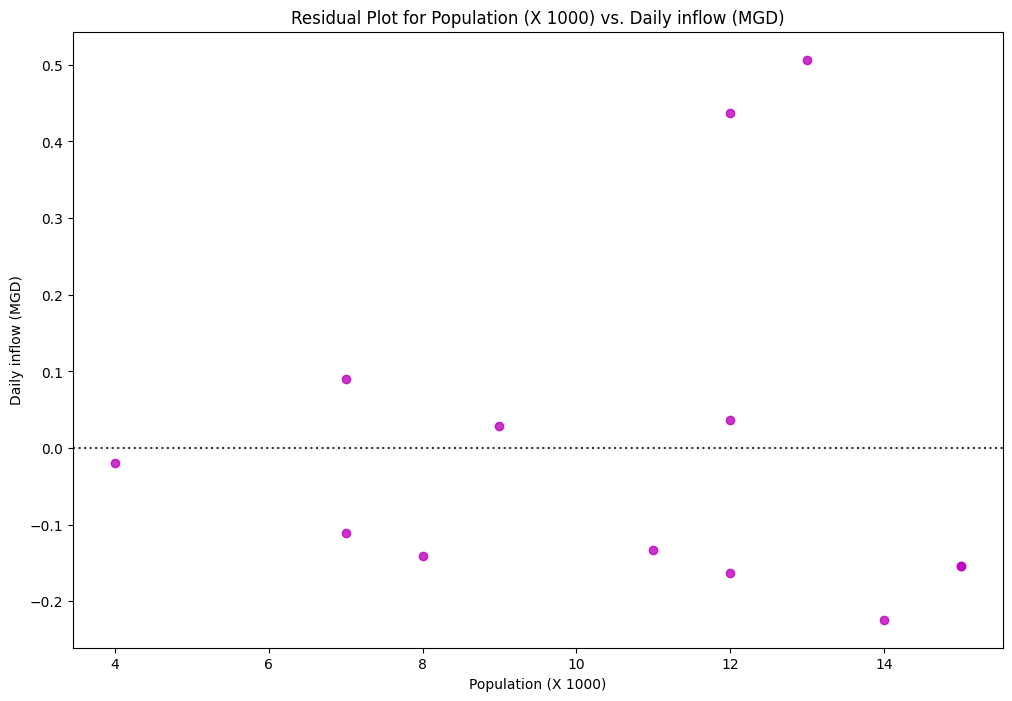

In [121]:
plt.figure(figsize=(12,8))
sns.residplot(x=X_train['Population (X 1000)'], y=y_train, color='m')
plt.title("Residual Plot for Population (X 1000) vs. Daily inflow (MGD)")
plt.xlabel("Population (X 1000)")
plt.ylabel("Daily inflow (MGD)")
plt.show()

### Data Preprocessing and Data Cleaning


## Model


## Liner Regression


In [122]:
X_train.shape

(13, 1)

In [123]:
X_train = X_train.reset_index(drop=True)
X_train

,Population (X 1000)
0,15
1,13
2,7
3,12
4,4
5,9
6,7
7,12
8,8
9,12


In [124]:
y_train.shape

(13, 1)

In [125]:
## library

from sklearn.linear_model import LinearRegression

## Instance

lre=LinearRegression()

In [126]:
### fit data

lre.fit(X_train, y_train)

LinearRegression()

In [127]:
## prediction on train set

ypred = lre.predict(X_train)


## Accuracy on Train Data



Mean square error(MSE) MSE = (1/n) * Σ(yi - ŷi)^2

Absolute Mean Squared Error (AMSE): AMSE = (1/n) * Σ|yi - ŷi|

Root Mean Squared Error (RMSE): RMSE = √((1/n) * Σ(yi - ŷi)^2)

In [128]:
#  Mean Squared Error (MSE)
mse = mean_squared_error(y_train, ypred)

#  Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Mean Absolute Error (MAE)
mae = np.mean(np.abs(y_train - ypred))

#  R-squared (R2) score
r2 = r2_score(y_train, ypred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae.mean():.2f}')
print(f'R-squared (R²) Score: {r2:.2f}')

Mean Squared Error (MSE): 0.05
Root Mean Squared Error (RMSE): 0.22
Mean Absolute Error (MAE): 0.17
R-squared (R²) Score: 0.79


In [129]:
lre.intercept_

array([-0.20295082])

In [130]:
lre.coef_

array([[0.1304918]])

In [131]:
## using cross validation

Lr_cv = -cross_val_score(lre, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
Lr_cv

array([0.15929543, 0.11862401, 0.00066994, 0.01173611, 0.03199957,
       0.02616484, 0.0016542 , 0.0206215 , 0.07017191, 0.03808967])

In [132]:
mean_cv = Lr_cv.mean()
mean_cv

np.float64(0.04790271810733731)

/tmp/ipython-input-1830087667.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_train, hist=False, color='red', label="Actual value")
/tmp/ipython-input-1830087667.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ypred, hist=False, color="b", label="fitted value", 

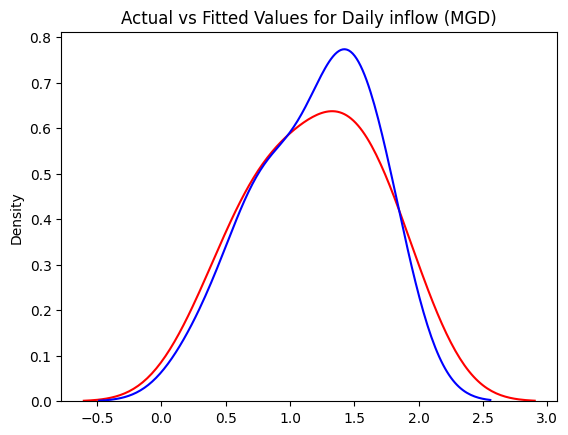

In [133]:
ax1 = sns.distplot(y_train, hist=False, color='red', label="Actual value")

sns.distplot(ypred, hist=False, color="b", label="fitted value", ax=ax1)

plt.title('Actual vs Fitted Values for Daily inflow (MGD)')

plt.show()

## Evaluation


In [135]:

X_test = X_test.reset_index(drop=True)
X_test

,Population (X 1000)
0,8
1,5
2,13
3,12


## Prediction on x_test using best model

In [136]:
y_pred_test = lre.predict(X_test)

## Accuracy on Test Data



In [137]:
#  Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_test)

#  Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

#  Mean Absolute Error (MAE)
mae = np.mean(np.abs(y_test - y_pred_test))

#  R-squared (R2) score
r2 = r2_score(y_test, y_pred_test)


print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae.mean():.2f}')
print(f'R-squared (R²) Score: {r2:.2f}')

Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.15
Mean Absolute Error (MAE): 0.13
R-squared (R²) Score: 0.92


/tmp/ipython-input-1207570026.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color='red', label="Actual value")
/tmp/ipython-input-1207570026.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_test, hist=False, color="b", label="fitted val

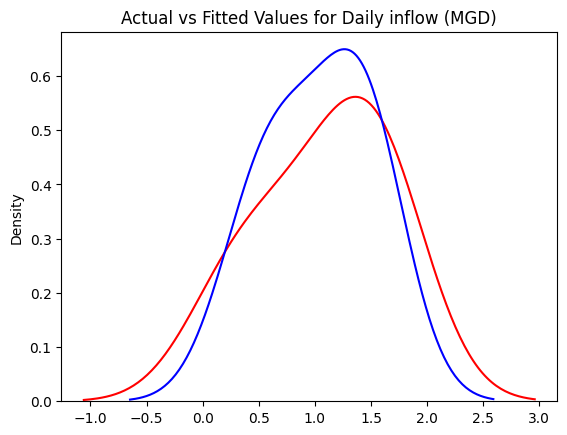

In [138]:
ax1 = sns.distplot(y_test, hist=False, color='red', label="Actual value")

sns.distplot(y_pred_test, hist=False, color="b", label="fitted value", ax=ax1)

plt.title('Actual vs Fitted Values for Daily inflow (MGD)')

plt.show()